# Demonstração

In [2]:
from src.sfots import SFOTS
from src.sfots import bmc_always, kinduction_always, model_checking_Interpolants, PDR
from timeit import timeit

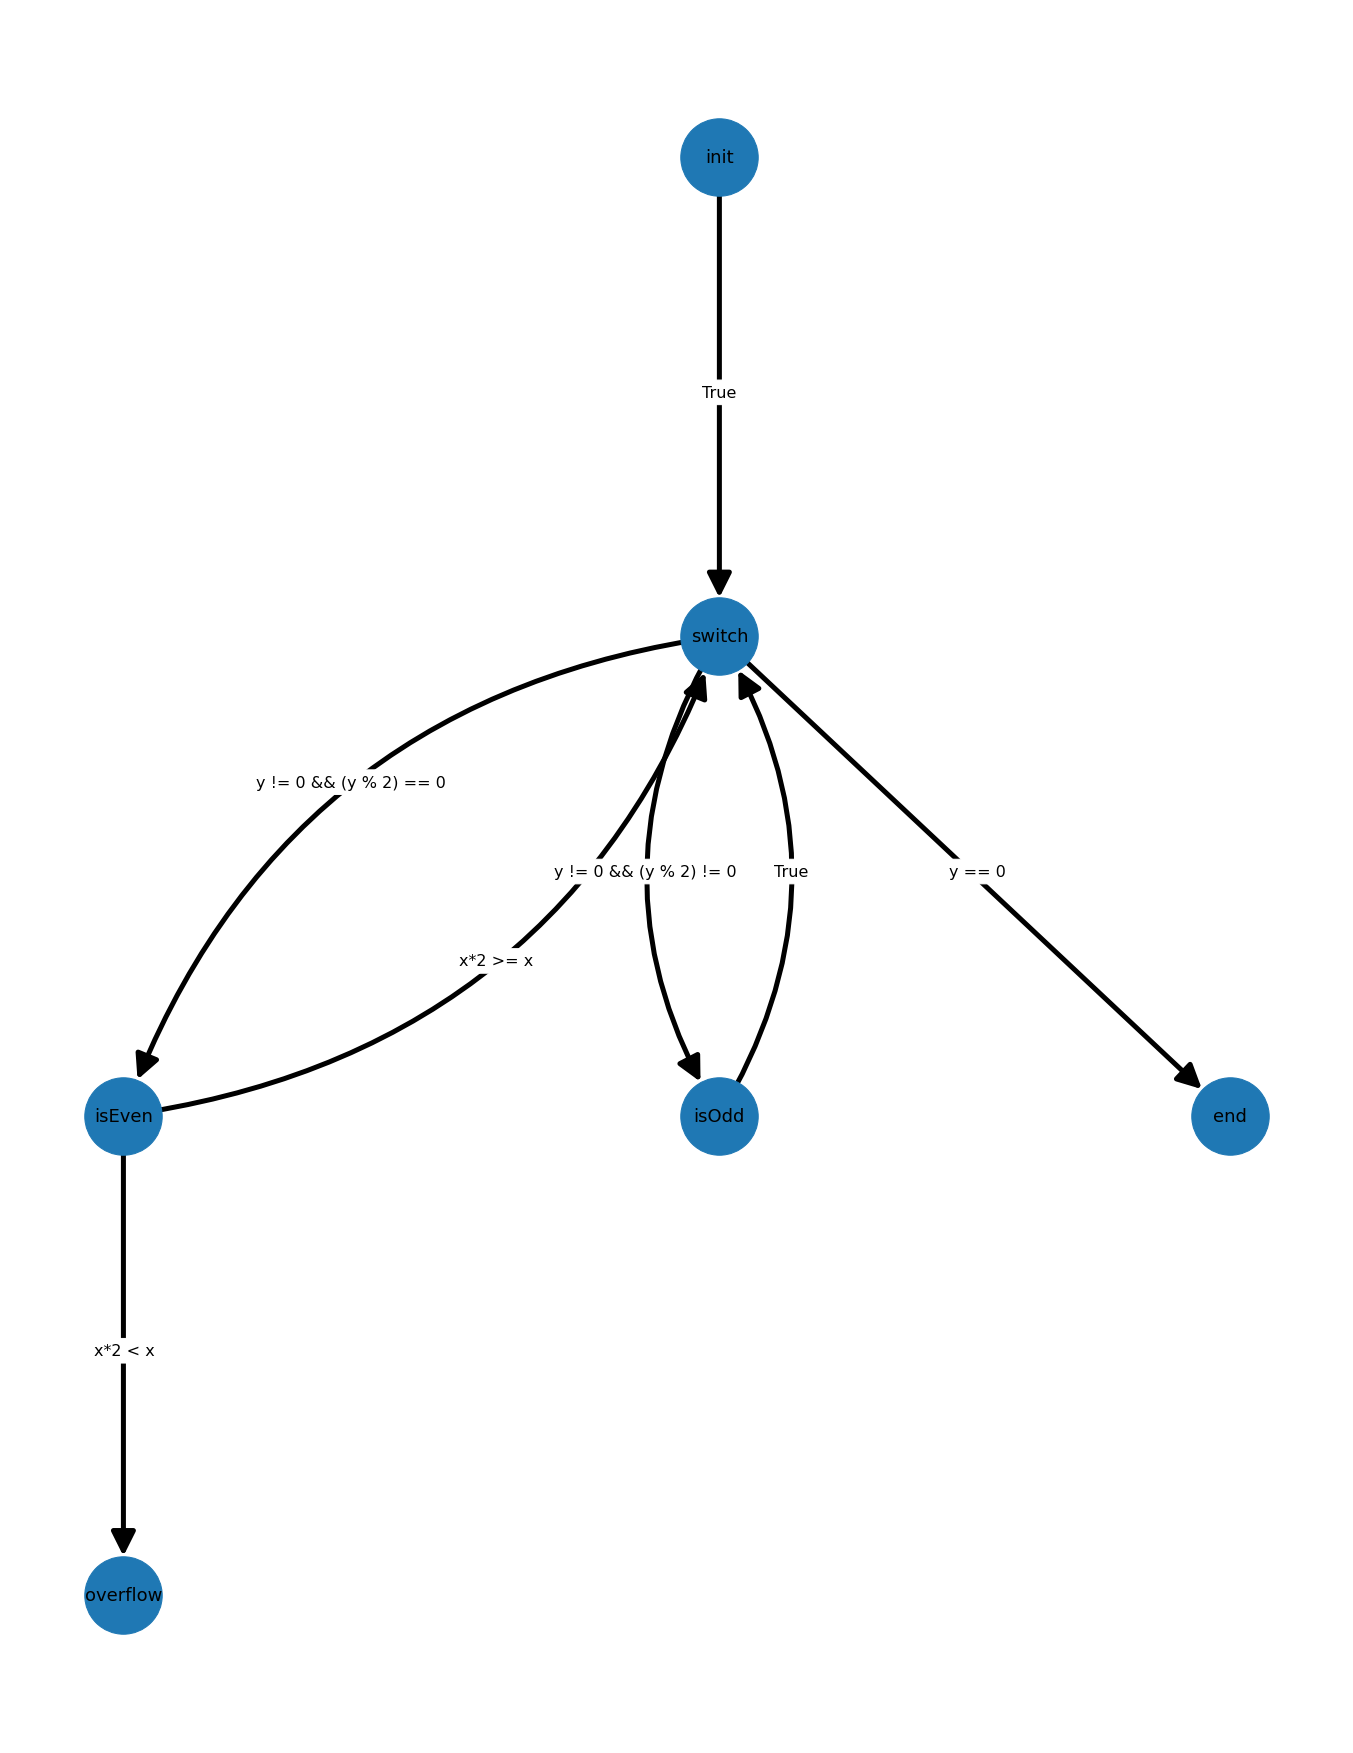

In [3]:
multiplication = {
    "init": (
        "x = 3; y = 4; z = 0;",
        [("switch", "")]
    ),
    "switch": (
        "",
        [("isEven", "y != 0 && (y % 2) == 0"), ("isOdd", "y != 0 && (y % 2) != 0"), ("end", "y == 0")]
    ),
    "isEven": (
        "x = 2 * x; y = y / 2;",
        [("switch", "x*2 >= x"), ("overflow", "x*2 < x")]
    ),
    "isOdd": (
        "y = y - 1; z = z + x;",
        [("switch", "")]
    ),
    "end": (
        "",
        [("end", "")]
    ),
    "overflow": (
        "",
        [("overflow", "")]
    )
}

multiplication_state = {
    "variables": ["x", "y", "z"],
    "error_states": ["overflow"],
    "size": 16
}

mult = SFOTS(multiplication, multiplication_state)
mult.plot()

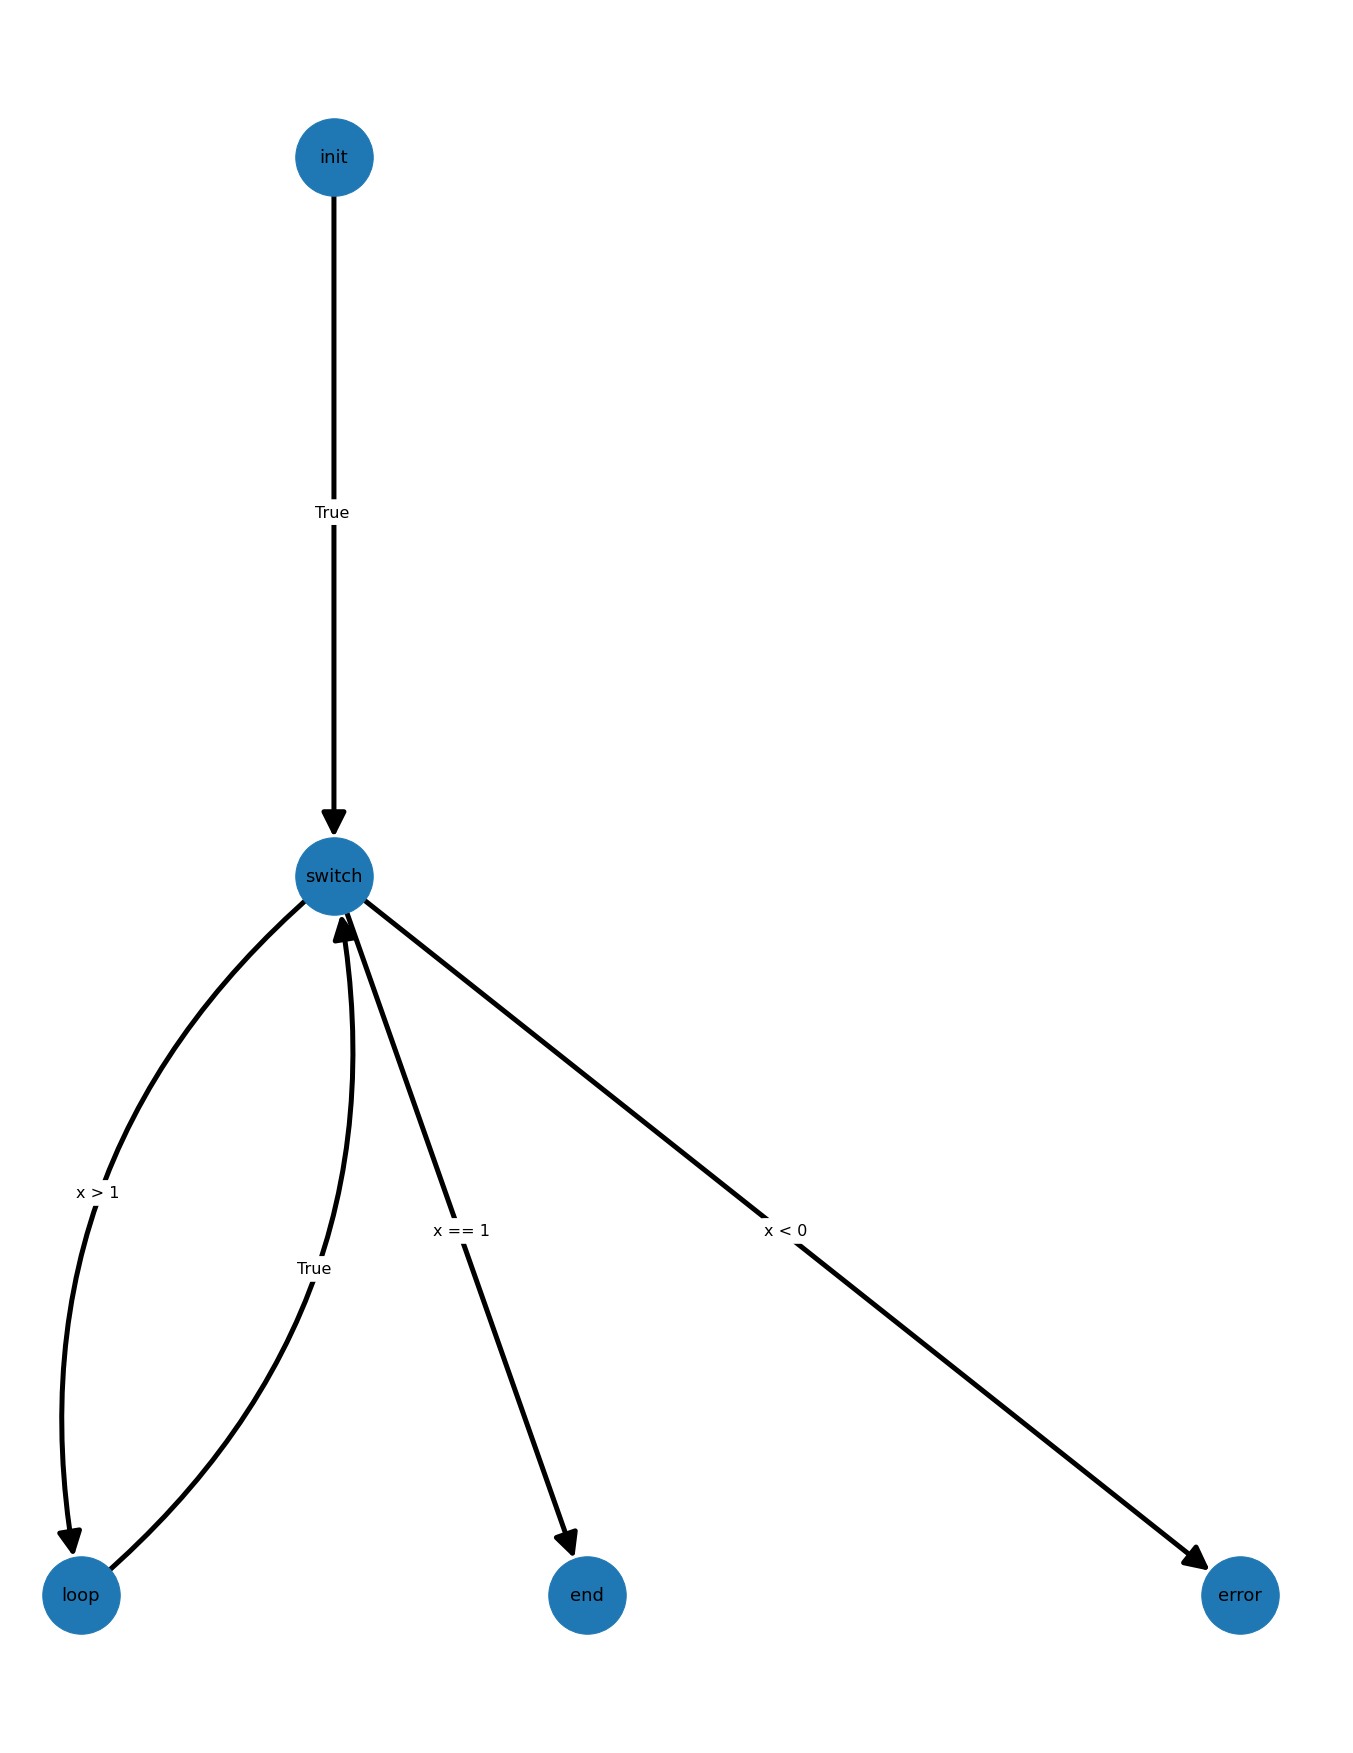

In [4]:
simple_loop = {
    "init": (
        "x = 10;",
        [("switch", "")]
    ),
    "switch": (
        "",
        [("loop", "x > 1"), ("end", "x == 1"), ("error", "x < 0")]
    ),
    "loop": (
        "x = x - 1;",
        [("switch", "")]
    ),
    "error": (
        "",
        [("error", "")]
    ),
    "end": (
        "",
        [("end", "")]
    )
}

loop_state = {
    "variables": ["x"],
    "error_states": ["error"],
    "size": 16
}

loop = SFOTS(simple_loop, loop_state)
loop.plot()

In [5]:
print("\nBMC")
bmc_always(loop, 15)
print("\nK-Induction")
kinduction_always(loop, 15)
print("\nInterpolants")
model_checking_Interpolants(loop, 20, 20, 15)
print("\nPDR")
PDR(mult, 15)


BMC
O invariante mantém-se nos primeiros 1 passos
O invariante mantém-se nos primeiros 2 passos
O invariante mantém-se nos primeiros 3 passos
O invariante mantém-se nos primeiros 4 passos
O invariante mantém-se nos primeiros 5 passos
O invariante mantém-se nos primeiros 6 passos
O invariante mantém-se nos primeiros 7 passos
O invariante mantém-se nos primeiros 8 passos
O invariante mantém-se nos primeiros 9 passos
O invariante mantém-se nos primeiros 10 passos
O invariante mantém-se nos primeiros 11 passos
O invariante mantém-se nos primeiros 12 passos
O invariante mantém-se nos primeiros 13 passos
O invariante mantém-se nos primeiros 14 passos
O invariante mantém-se nos primeiros 15 passos

K-Induction
A propriedade é válida!

Interpolants
fim
Safe

PDR
Property's status is unknown: exceeded maximum number of iterations


In [14]:
def timer(sfots, reps):
    k = 15
    return {
        "bmc": timeit(lambda: bmc_always(sfots, k), number=reps)/reps,
        "k-induction": timeit(lambda: kinduction_always(sfots, k), number=reps)/reps,
        "interpolants": timeit(lambda: model_checking_Interpolants(sfots, 20, 20, k), number=reps)/reps,
        "pdr": timeit(lambda: PDR(sfots, k), number=reps)/reps
    }


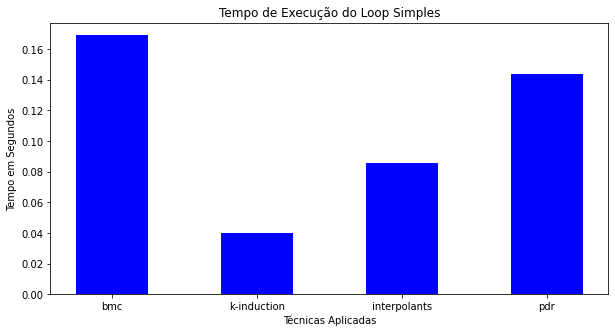

In [25]:
import matplotlib.pyplot as plt
import sys, os

def plot(data, title, color):
    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(courses, values, color = color, width = 0.5)

    plt.xlabel("Técnicas Aplicadas")
    plt.ylabel("Tempo em Segundos")
    plt.title(title)
    plt.show()

sys.stdout = open(os.devnull, 'w')
data = timer(loop, 10)
sys.stdout = sys.__stdout__
plot(data, "Tempo de Execução do Loop Simples", "blue")

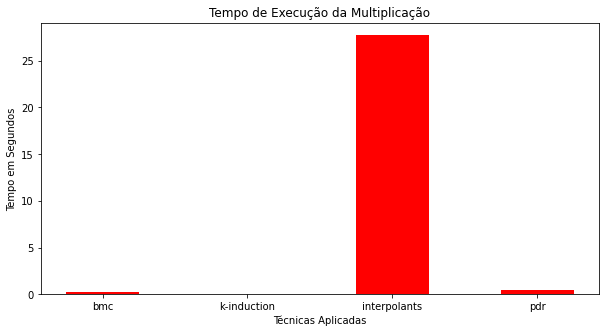

In [20]:
sys.stdout = open(os.devnull, 'w')
data = timer(mult, 1)
sys.stdout = sys.__stdout__
plot(data, "Tempo de Execução da Multiplicação", "red")